In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import os
import cv2


In [2]:
# Ruta al directorio de las imágenes organizadas en subcarpetas por clase
base_dir = r'/content/drive/MyDrive/ColabNotebooks/Diplomado /DatosEntrega/7272660'

In [3]:
# Generador de datos con aumento y división en entrenamiento/validación
datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2, # 20% validacion y 80% entrenamiento
    rotation_range=10,
    zoom_range=0.1,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True,
    fill_mode='nearest'
)

# Generadores
train_gene = datagen.flow_from_directory(
    base_dir,
    target_size=(128, 128),
    batch_size=16,
    class_mode='categorical',
    subset='training',
    shuffle=True
)

val_gene = datagen.flow_from_directory(
    base_dir,
    target_size=(128, 128),
    batch_size=16,
    class_mode='categorical',
    subset='validation',
    shuffle= False
)

Found 588 images belonging to 3 classes.
Found 147 images belonging to 3 classes.


In [4]:
# Modelo CNN para clasificación (Normal, Benign, Malignant)
model = keras.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 3)),
    layers.MaxPooling2D(2, 2),

    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D(2, 2),

    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D(2, 2),

    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.3),
    layers.Dense(3, activation='softmax')  # 3 clases
])


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [5]:
#Compilacion del proceso de entrenamiento
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [6]:
#Resumen del modelo
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 126, 126, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 61, 61, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 28, 28, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │     3,211,392 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 3)              │           387 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,305,027 (12.61 MB)

 Trainable params: 3,305,027 (12.61 MB)

 Non-trainable params: 0 (0.00 B)

In [10]:
# Entrenamiento
history = model.fit(
    train_gene,
    steps_per_epoch=train_gene.samples // train_gene.batch_size,
    validation_data=val_gene,
    validation_steps=val_gene.samples // val_gene.batch_size,
    epochs=20
)

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/20
36/36 ━━━━━━━━━━━━━━━━━━━━ 427s 12s/step - accuracy: 0.6043 - loss: 0.9708 - val_accuracy: 0.6528 - val_loss: 0.8804
Epoch 2/20
 1/36 ━━━━━━━━━━━━━━━━━━━━ 24s 705ms/step - accuracy: 0.5000 - loss: 0.9834

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/epoch_iterator.py:107: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


36/36 ━━━━━━━━━━━━━━━━━━━━ 17s 458ms/step - accuracy: 0.5000 - loss: 0.9834 - val_accuracy: 0.6528 - val_loss: 0.8907
Epoch 3/20
36/36 ━━━━━━━━━━━━━━━━━━━━ 41s 1s/step - accuracy: 0.5834 - loss: 0.9083 - val_accuracy: 0.6458 - val_loss: 0.8100
Epoch 4/20
36/36 ━━━━━━━━━━━━━━━━━━━━ 3s 72ms/step - accuracy: 0.5625 - loss: 1.0219 - val_accuracy: 0.6319 - val_loss: 0.7812
Epoch 5/20
36/36 ━━━━━━━━━━━━━━━━━━━━ 64s 704ms/step - accuracy: 0.6148 - loss: 0.8329 - val_accuracy: 0.6736 - val_loss: 0.7775
Epoch 6/20
36/36 ━━━━━━━━━━━━━━━━━━━━ 5s 131ms/step - accuracy: 0.5000 - loss: 0.9475 - val_accuracy: 0.6667 - val_loss: 0.7788
Epoch 7/20
36/36 ━━━━━━━━━━━━━━━━━━━━ 25s 698ms/step - accuracy: 0.5740 - loss: 0.8387 - val_accuracy: 0.6458 - val_loss: 0.7612
Epoch 8/20
36/36 ━━━━━━━━━━━━━━━━━━━━ 6s 149ms/step - accuracy: 0.6875 - loss: 0.7206 - val_accuracy: 0.6111 - val_loss: 0.7686
Epoch 9/20
36/36 ━━━━━━━━━━━━━━━━━━━━ 41s 1s/step - accuracy: 0.6302 - loss: 0.7633 - val_accuracy: 0.6806 - val_lo

In [12]:
# Evaluación
val_loss, val_acc = model.evaluate(val_gene, verbose=0)
print(f"\nPrecisión en validación: {val_acc:.4f}")



Precisión en validación: 0.6531


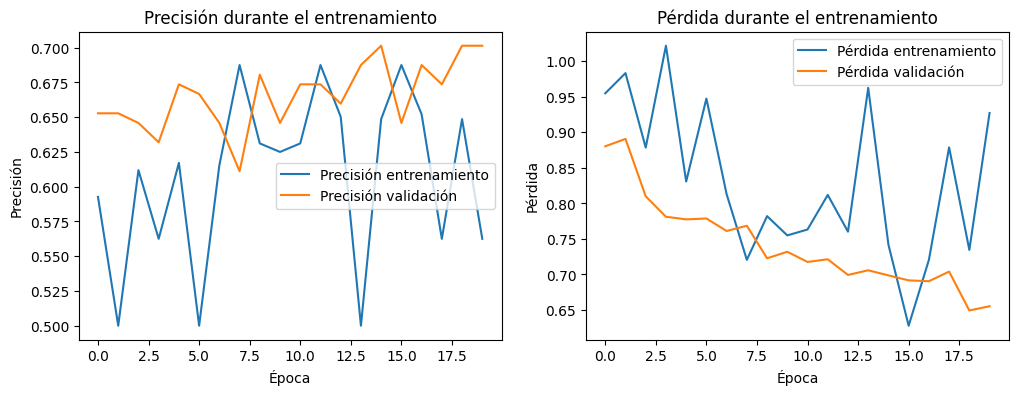

In [13]:
## Graficas precisión durante el entrenamiento
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Precisión entrenamiento')
plt.plot(history.history['val_accuracy'], label='Precisión validación')
plt.xlabel('Época')
plt.ylabel('Precisión')
plt.title('Precisión durante el entrenamiento')
plt.legend()


plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Pérdida entrenamiento')
plt.plot(history.history['val_loss'], label='Pérdida validación')
plt.xlabel('Época')
plt.ylabel('Pérdida')
plt.title('Pérdida durante el entrenamiento')
plt.legend()
plt.show()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 152ms/step


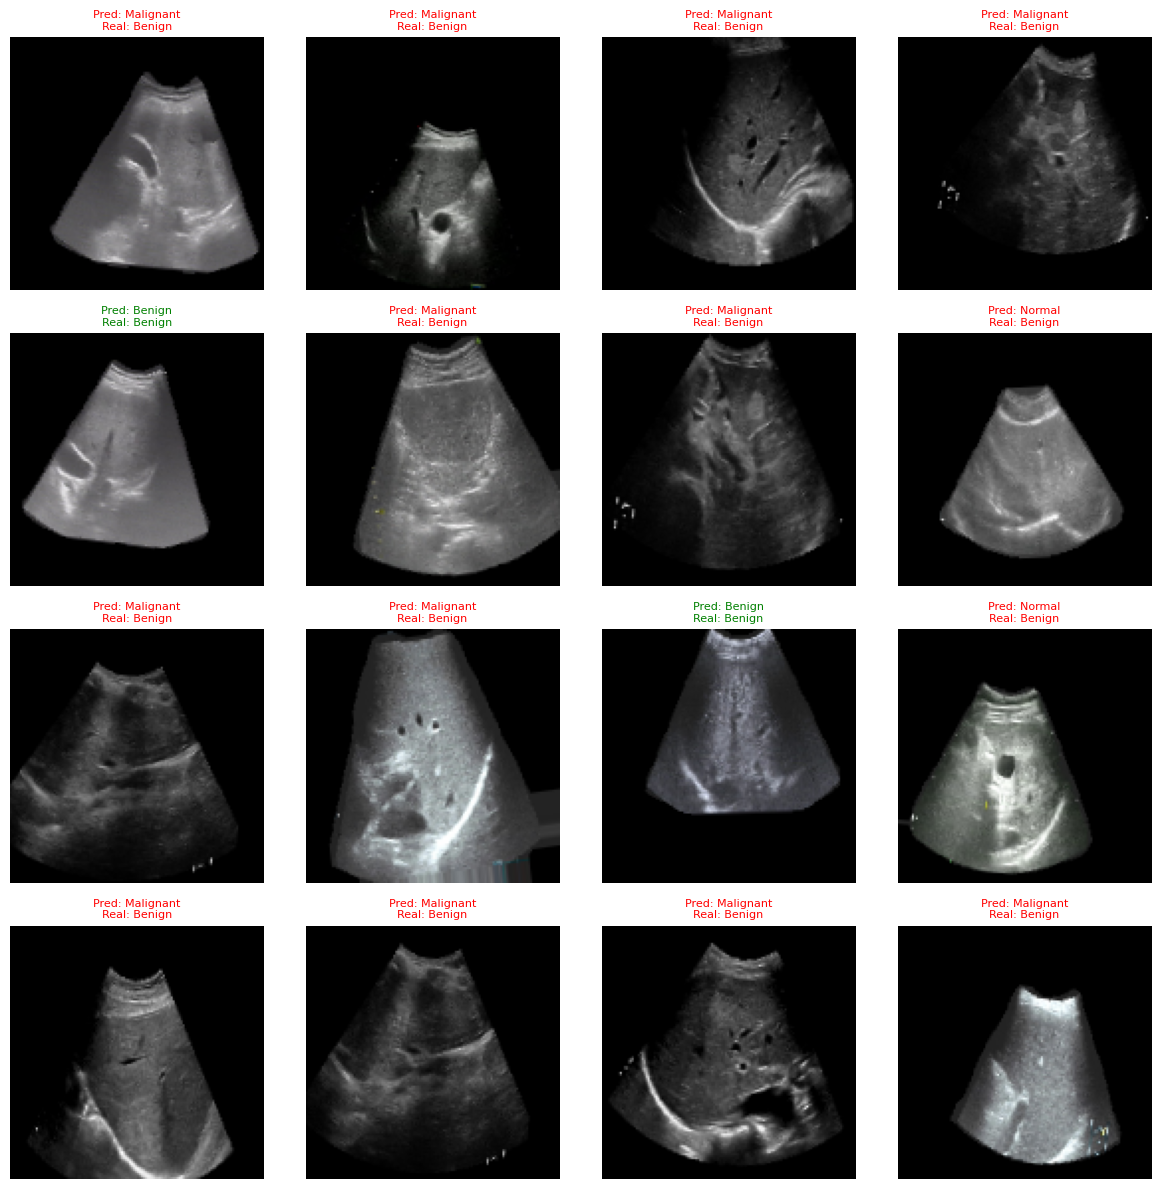

In [16]:
val_images, val_labels = next(val_gene)
predictions = model.predict(val_images)
predicted_labels = np.argmax(predictions, axis=1)
true_labels = np.argmax(val_labels, axis=1)
class_names = list(train_gene.class_indices.keys())

plt.figure(figsize=(12, 12))
for i in range(min(16, len(val_images))):
    plt.subplot(4, 4, i+1)
    plt.imshow(val_images[i])
    color = 'green' if predicted_labels[i] == true_labels[i] else 'red'
    plt.title(f'Pred: {class_names[predicted_labels[i]]}\nReal: {class_names[true_labels[i]]}', color=color, fontsize=8)
    plt.axis('off')
plt.tight_layout()
plt.show()


Observamos que al hacer el modelo, sin la aplicacion de algun filtro, este tiene una precisión en validación del 0.6531, lo cual no es conveniente, ya que de acuerdo a las imagenes mayormente los benignos los toma como malignos, provocando un error en el análisis clínico causando que el tratamiento sea muy invacivo (cuando no se requeria).


## Aplicacion del filtro Sobel

In [47]:
#Cargar nuevamente el modelo, para que empiece de cero y no con la informaciòn ya aprendida.
model_sobel = keras.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 3)),
    layers.MaxPooling2D(2, 2),

    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D(2, 2),

    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D(2, 2),

    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.3),
    layers.Dense(3, activation='softmax')  # 3 clases
])

model_sobel.compile(optimizer='adam',
                    loss='categorical_crossentropy',
                    metrics=['accuracy'])


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [48]:
#Deninir el filtro Sobel

def sobel_preprocessing(image):
    image = (image * 255).astype(np.uint8)  # Desnormalizamos
    image_gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
    sobelx = cv2.Sobel(image_gray, cv2.CV_64F, 1, 0, ksize=3)
    sobely = cv2.Sobel(image_gray, cv2.CV_64F, 0, 1, ksize=3)
    sobel = np.sqrt(sobelx**2 + sobely**2)
    sobel = np.uint8(np.clip(sobel, 0, 255))
    sobel_rgb = np.stack([sobel]*3, axis=-1)  # Volvemos a formato RGB
    return sobel_rgb / 255.0  # Re-normalizamos a [0, 1]


In [49]:
#Crear un generador personalizado con filtro
def sobel_generator(generator):
    while True:
        for batch_x, batch_y in generator:
            batch_x_sobel = np.array([sobel_preprocessing(img) for img in batch_x])
            yield batch_x_sobel, batch_y
        generator.reset()  #reiniciar el generador original

In [50]:
#Crear generadores filtrados

train_sobel = sobel_generator(train_gene)
val_sobel = sobel_generator(val_gene)


In [35]:
!pip install opencv-python #instalación para poder usar cv2

In [51]:
import cv2

In [52]:
history_sobel = model_sobel.fit(
    train_sobel,
    steps_per_epoch=train_gene.samples // train_gene.batch_size,
    validation_data=val_sobel,
    validation_steps=val_gene.samples // val_gene.batch_size,
    epochs=20
)

Epoch 1/20
36/36 ━━━━━━━━━━━━━━━━━━━━ 27s 714ms/step - accuracy: 0.5467 - loss: 1.0543 - val_accuracy: 0.6336 - val_loss: 0.9304
Epoch 2/20
36/36 ━━━━━━━━━━━━━━━━━━━━ 41s 1s/step - accuracy: 0.6139 - loss: 0.8761 - val_accuracy: 0.6794 - val_loss: 0.7754
Epoch 3/20
36/36 ━━━━━━━━━━━━━━━━━━━━ 25s 690ms/step - accuracy: 0.6473 - loss: 0.8238 - val_accuracy: 0.7405 - val_loss: 0.7024
Epoch 4/20
36/36 ━━━━━━━━━━━━━━━━━━━━ 23s 645ms/step - accuracy: 0.5746 - loss: 0.8578 - val_accuracy: 0.8550 - val_loss: 0.4636
Epoch 5/20
36/36 ━━━━━━━━━━━━━━━━━━━━ 41s 1s/step - accuracy: 0.6345 - loss: 0.7580 - val_accuracy: 0.8472 - val_loss: 0.4479
Epoch 6/20
36/36 ━━━━━━━━━━━━━━━━━━━━ 41s 1s/step - accuracy: 0.5986 - loss: 0.7529 - val_accuracy: 0.8542 - val_loss: 0.4417
Epoch 7/20
36/36 ━━━━━━━━━━━━━━━━━━━━ 41s 1s/step - accuracy: 0.5904 - loss: 0.7975 - val_accuracy: 0.7708 - val_loss: 0.5447
Epoch 8/20
36/36 ━━━━━━━━━━━━━━━━━━━━ 41s 1s/step - accuracy: 0.6878 - loss: 0.7588 - val_accuracy: 0.7176 - 

In [57]:
val_loss_sobel, val_acc_sobel = model_sobel.evaluate(
    val_sobel,
    steps=val_gene.samples // val_gene.batch_size,
    verbose=1
)

print(f"\nPrecisión en validación (Sobel): {val_loss_sobel:.4f}")

9/9 ━━━━━━━━━━━━━━━━━━━━ 2s 237ms/step - accuracy: 0.6735 - loss: 0.6961

Precisión en validación (Sobel): 0.6555


Observamos que aparentemente mejoró un poco la clasificación, solo por decimas, por lo tanto, el filtro no es el más recomendado.

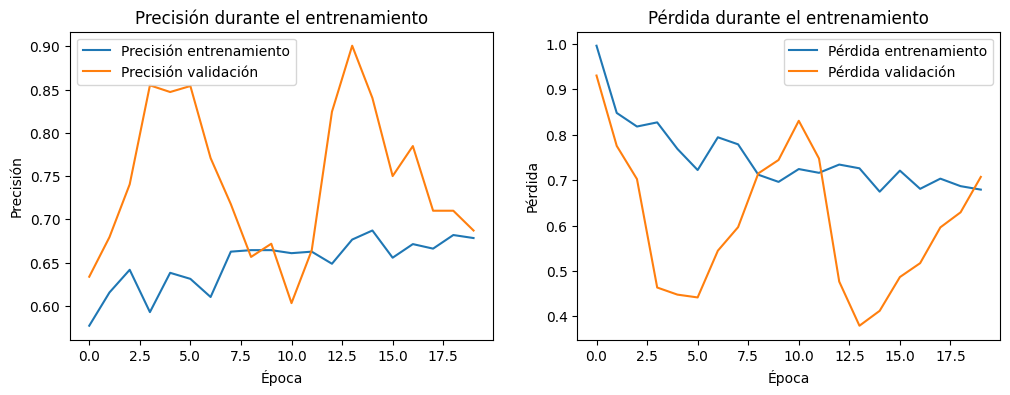

In [53]:
## Graficas precisión durante el entrenamiento
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history_sobel.history['accuracy'], label='Precisión entrenamiento')
plt.plot(history_sobel.history['val_accuracy'], label='Precisión validación')
plt.xlabel('Época')
plt.ylabel('Precisión')
plt.title('Precisión durante el entrenamiento')
plt.legend()


plt.subplot(1, 2, 2)
plt.plot(history_sobel.history['loss'], label='Pérdida entrenamiento')
plt.plot(history_sobel.history['val_loss'], label='Pérdida validación')
plt.xlabel('Época')
plt.ylabel('Pérdida')
plt.title('Pérdida durante el entrenamiento')
plt.legend()
plt.show()

##Conclusión:

Elegí el filtro sobel, porque deseaba detectar los bordes de las imagenes del higado, ya aque puede resalatar las aquellas regiones(texturas) bruscas, por ejemplo para resaltar los casos normales vs. patológicos.

Por otro lado, las regiones de casos benignos y malignos en los bordes de las lesiones pueden tener características diferentes (las malignas suelen tener bordes más irregulares) y  con cierto efecto de suavizado que puede ayudar con el ruido típico de las ecografías.

Sin embargo, al observar en las graficas observamos que el proceso de validación difiere mucho con el de entrenamiento, es decir, que el de validación(con el del filtro sobel) no calculará con precisión la clasifición de benigno, maligno y normal. Esto puede deberse a la elección del filtro, ya que al enfocarse solo en bordes, se pierde información valiosa sobre patrones internos del tejido. Una alternativa es comprar con otro tipo de filtros, por ejemplo el Lapaciano  o el Gabor, que de acuerdo referencias consultadas es bueno para las texturas.

## Referencia bibliografica:

Xu, Y., Bowen, Z., Xiaohong, L., Tao, W., Jinxiu, J., Shijie, W., Yufan, L., Hongjun, Z., Tong, L., Ye, S., Rui, J., Guangyu, W., Jie, R., & Ting, C. (2022). Annotated Ultrasound Liver images [Data set]. Zenodo. https://doi.org/10.5281/zenodo.7272660